In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## TASK 1

In [2]:
df=pd.read_csv('Cardiotocographic.csv')

In [3]:
df.shape

(2126, 14)

In [4]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [6]:
df= df.fillna(df.median)

In [7]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [8]:
df.duplicated().sum()

2

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes


LB           object
AC           object
FM          float64
UC          float64
DL          float64
DS           object
DP           object
ASTV        float64
MSTV        float64
ALTV        float64
MLTV         object
Width        object
Tendency     object
NSP          object
dtype: object

In [12]:
for col in df.columns:
    if df[col].dtypes== object:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [13]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

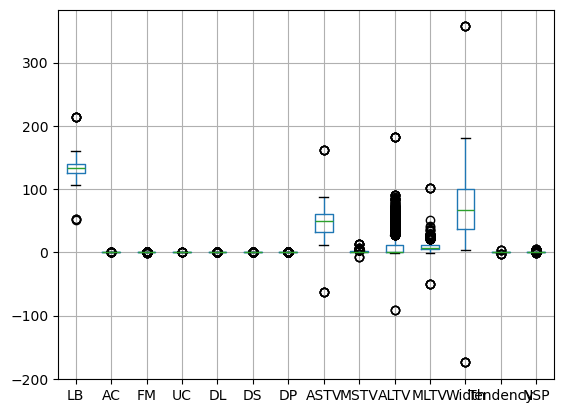

In [14]:
df.boxplot()
plt.show()

In [17]:
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR=q3-q1
    lower_extreme=q1-(1.5*IQR)
    upper_extreme=q3+(1.5*IQR)
    df[column]=df[column].apply(lambda x: lower_extreme if x< lower_extreme else upper_extreme if x> upper_extreme else x)
for col in df.columns:
    outlier_capping(df,col)

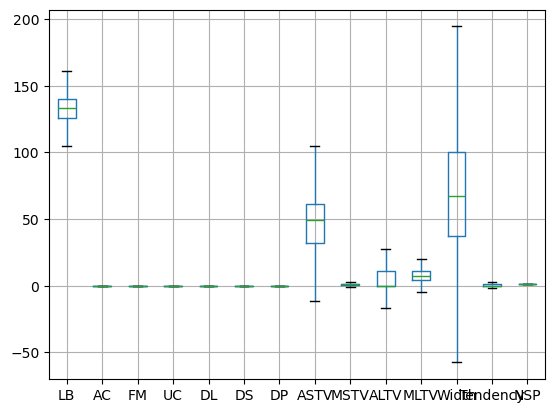

In [18]:
df.boxplot()
plt.show()


In [19]:
## TASK 2

In [20]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2103.000000,2104.000000,2124.000000,2124.000000,2124.000000,2103.0,2103.0,2124.000000,2124.000000,2124.000000,2103.000000,2103.000000,2103.000000,2103.0
mean,133.291604,0.003149,0.001570,0.004365,0.001772,0.0,0.0,46.998334,1.304554,6.697979,8.017610,70.351685,0.319999,1.0
std,9.976211,0.003851,0.002487,0.003001,0.002670,0.0,0.0,17.609911,0.781303,10.381254,5.094192,39.773195,0.624916,0.0
min,105.000000,-0.008475,-0.003853,-0.005158,-0.004938,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.850000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001634,0.000000,0.004486,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.486468,0.000000,1.0
75%,140.000000,0.005650,0.002568,0.006536,0.003292,0.0,0.0,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.0
max,161.000000,0.014124,0.006421,0.013552,0.008230,0.0,0.0,104.500000,3.200000,27.500000,20.350000,194.500000,2.500000,1.0


In [ ]:
##TASK 3

In [29]:
sns.histplot(data=df,kde=True,bins=20)

<Axes: ylabel='Count'>

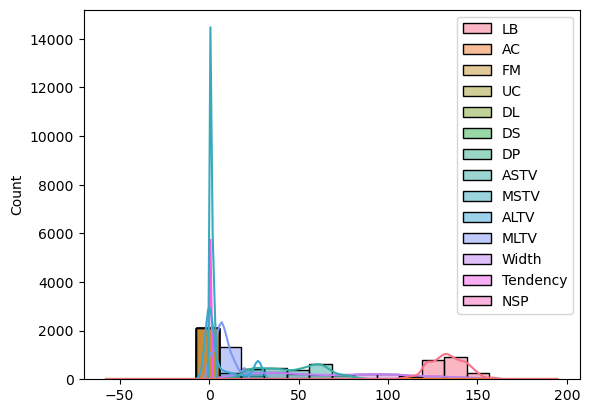

In [30]:
plt.show()

In [31]:
corr=df.corr()

In [32]:
corr

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.081715,-0.006859,-0.163765,-0.156858,NaN,NaN,0.286501,-0.297040,0.323777,-0.041651,-0.140008,0.281361,NaN
AC,-0.081715,1.000000,0.076600,0.093536,-0.103370,NaN,NaN,-0.273942,0.219101,-0.410713,-0.151983,0.284221,0.029530,NaN
FM,-0.006859,0.076600,1.000000,-0.318156,-0.018024,NaN,NaN,0.155798,0.070412,-0.013820,-0.036405,0.165220,0.000681,NaN
UC,-0.163765,0.093536,-0.318156,1.000000,0.268151,NaN,NaN,-0.217484,0.298462,-0.294226,-0.072768,0.131470,-0.074464,NaN
DL,-0.156858,-0.103370,-0.018024,0.268151,1.000000,NaN,NaN,-0.112289,0.566625,-0.296383,-0.242131,0.516234,0.014642,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.286501,-0.273942,0.155798,-0.217484,-0.112289,NaN,NaN,1.000000,-0.433731,0.438800,-0.324869,-0.243003,-0.010316,NaN
MSTV,-0.297040,0.219101,0.070412,0.298462,0.566625,NaN,NaN,-0.433731,1.000000,-0.541296,0.013248,0.650855,-0.063484,NaN
ALTV,0.323777,-0.410713,-0.013820,-0.294226,-0.296383,NaN,NaN,0.438800,-0.541296,1.000000,-0.133663,-0.441284,0.050687,NaN


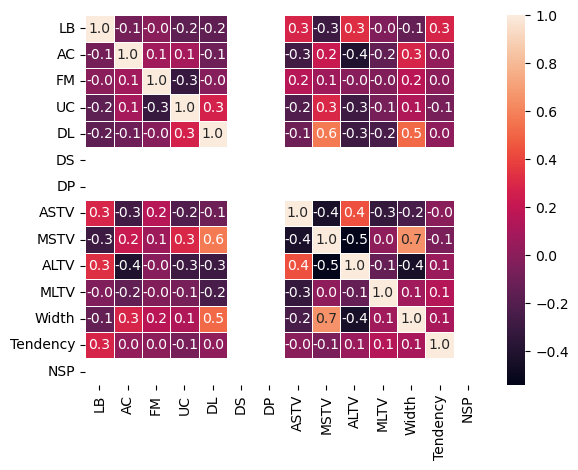

In [50]:
sns.heatmap(corr,annot=True,fmt=".1f",linewidths=0.5)

plt.tight_layout
plt.show()

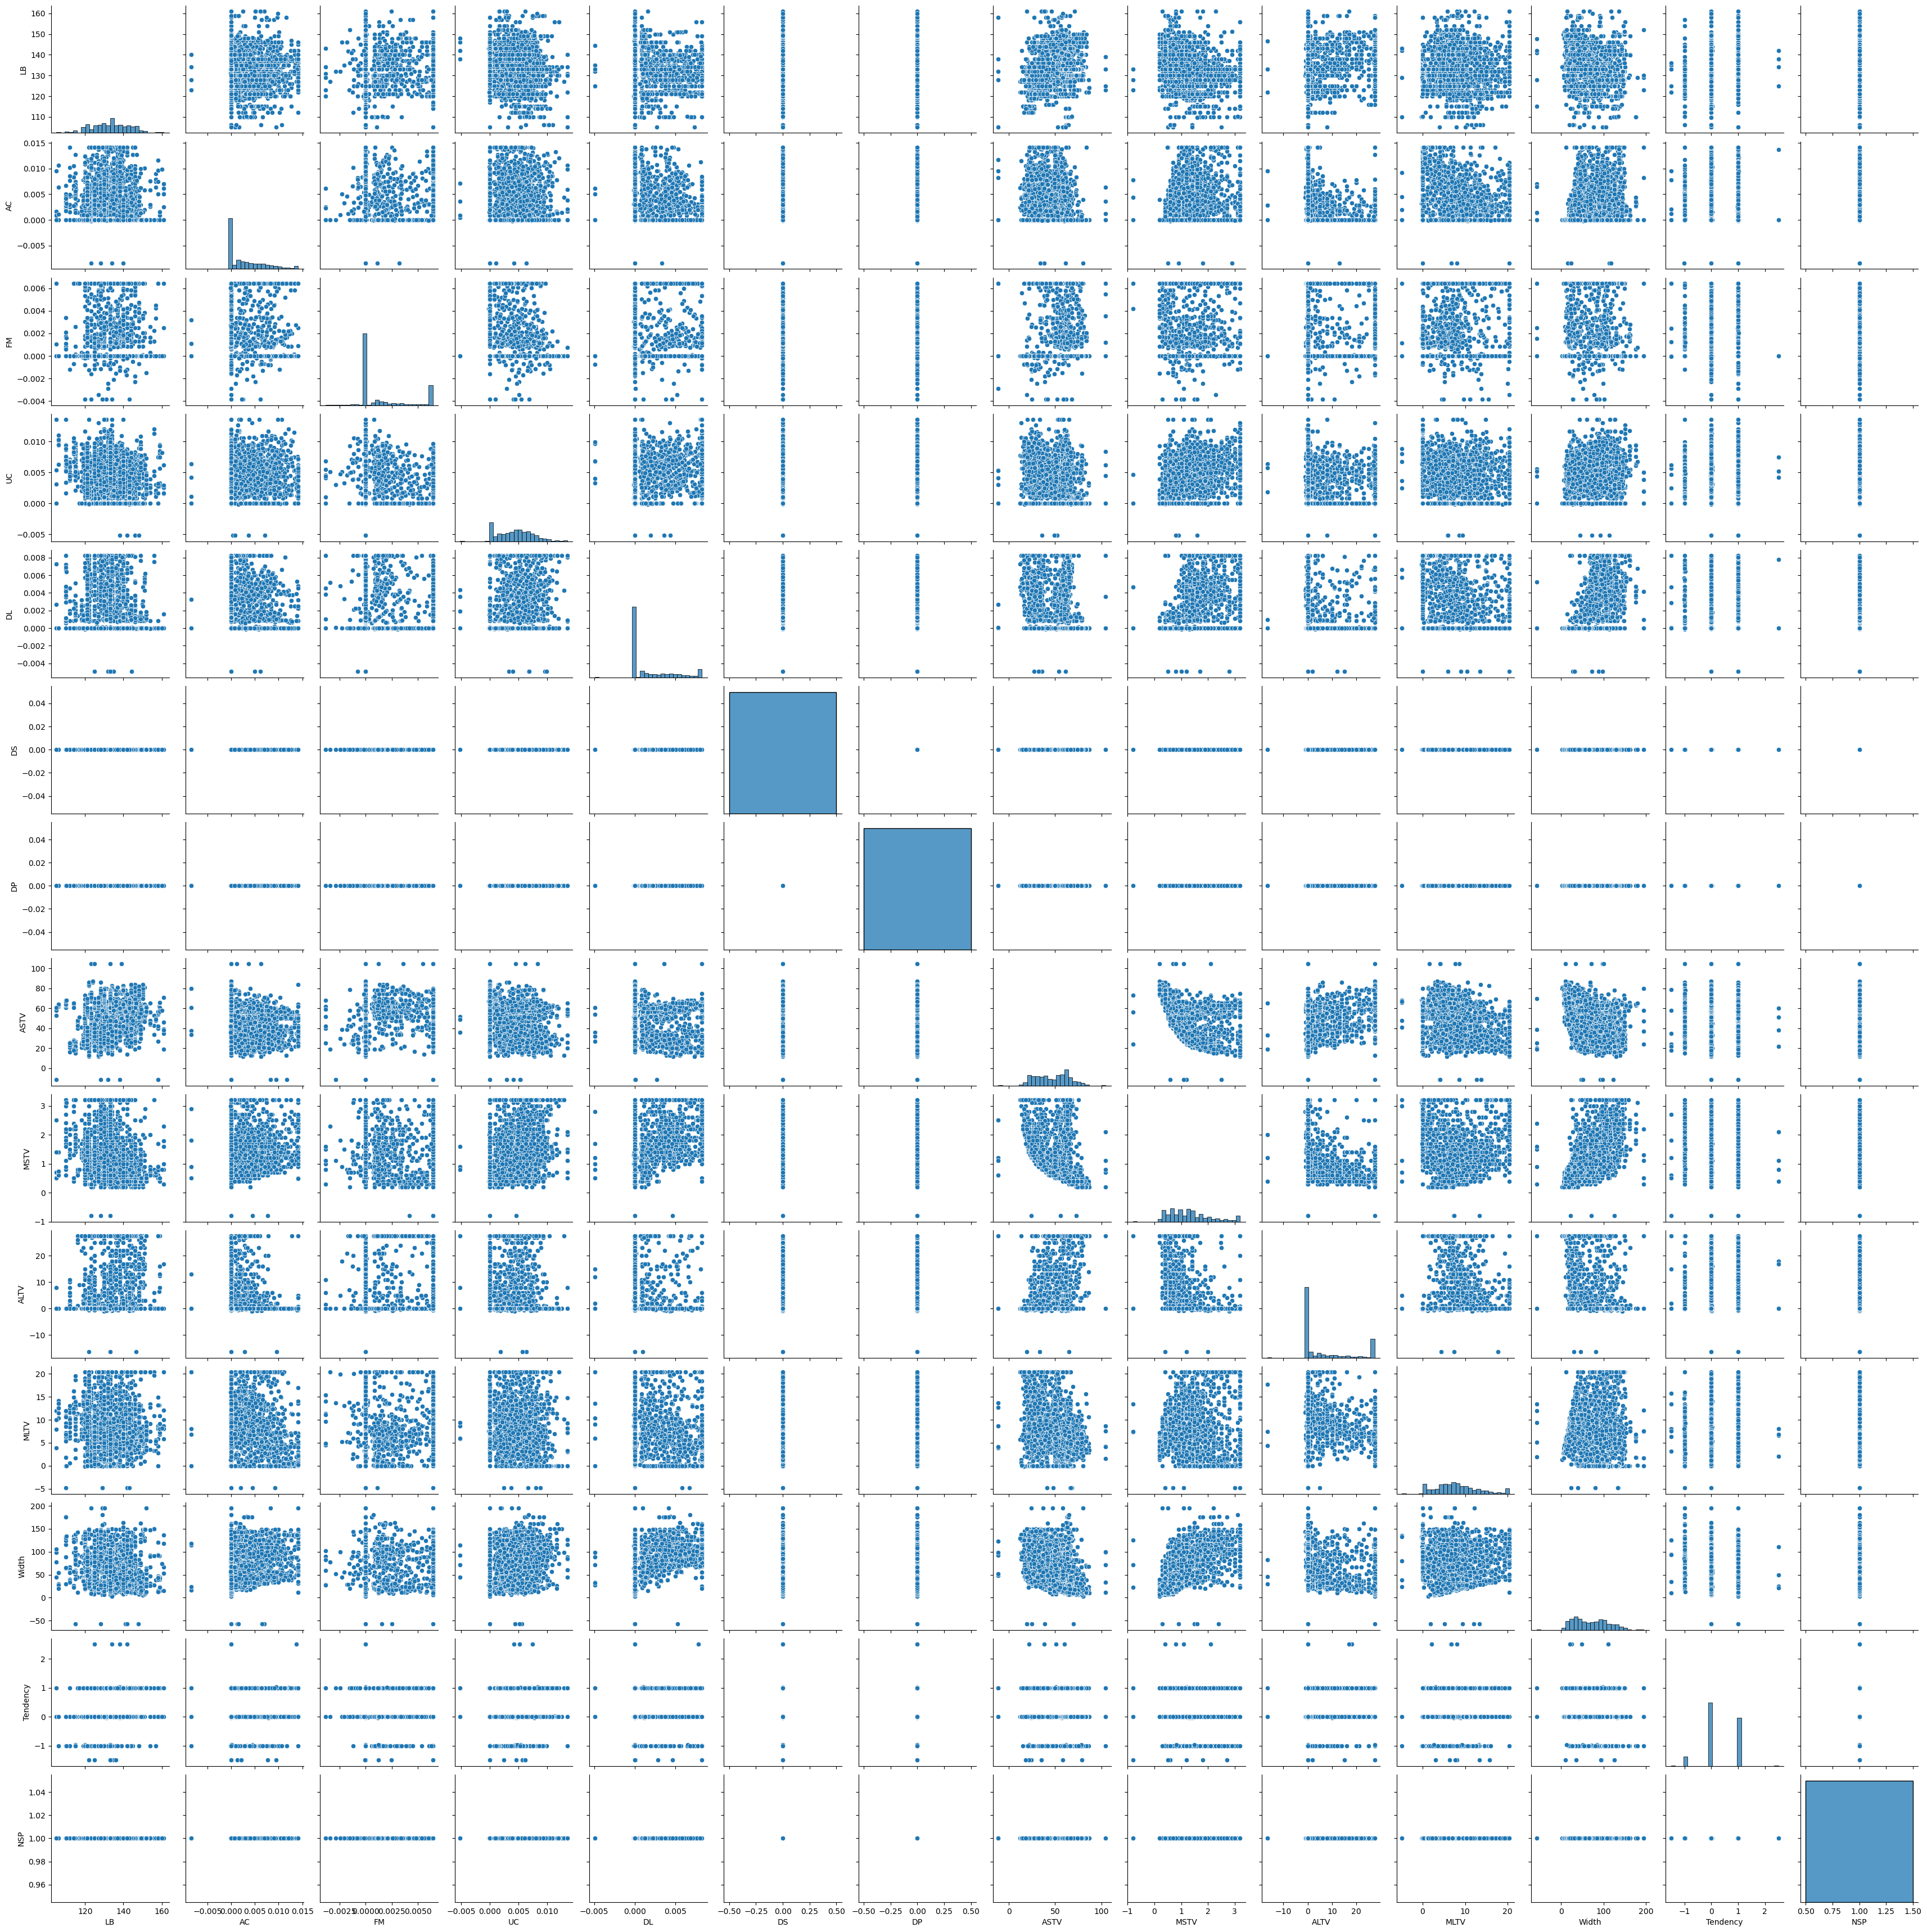

In [51]:
sns.pairplot(data=df)
plt.show()

In [52]:
##Task 4

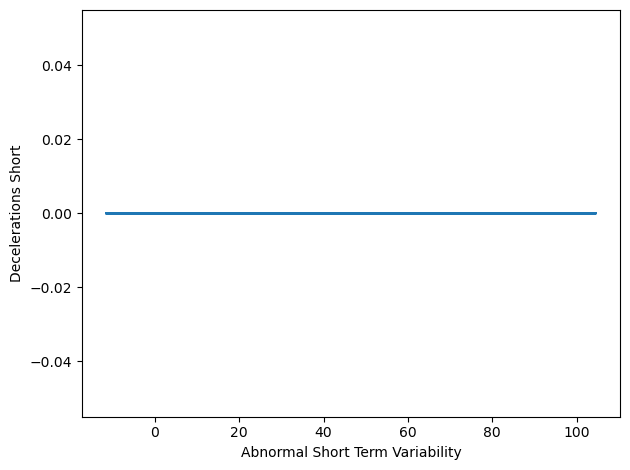

In [53]:
plt.plot(df['ASTV'],df['DS'])
plt.xlabel("Abnormal Short Term Variability")
plt.ylabel("Decelerations Short")
plt.tight_layout()
plt.show()

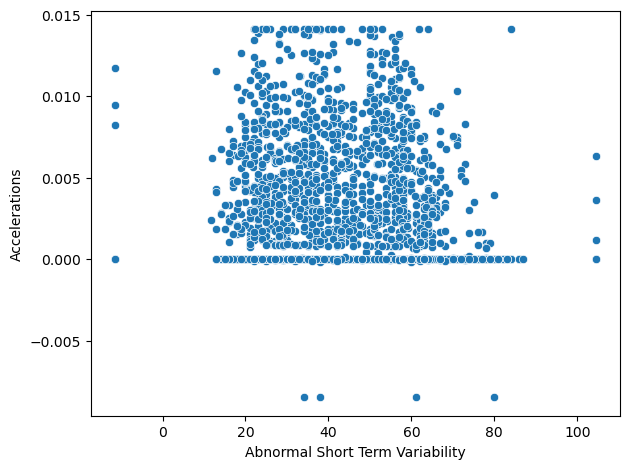

In [71]:
sns.scatterplot(data=df, x='ASTV', y='AC')
plt.xlabel("Abnormal Short Term Variability")
plt.ylabel("Accelerations")
plt.tight_layout()
plt.show()

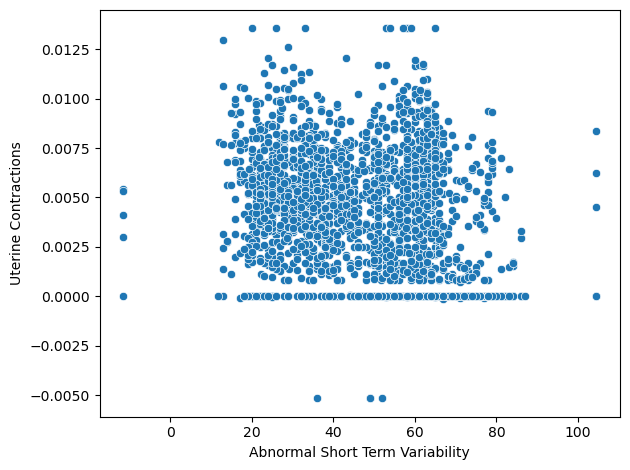

In [70]:
sns.scatterplot(data=df, x='ASTV', y='UC')
plt.xlabel("Abnormal Short Term Variability")
plt.ylabel("Uterine Contractions")
plt.tight_layout()
plt.show()

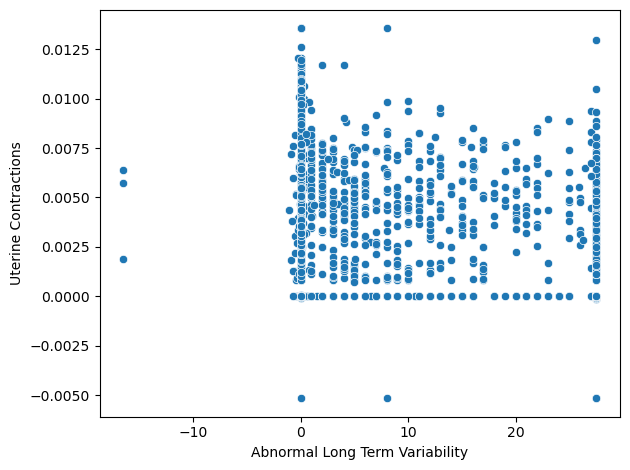

In [72]:
sns.scatterplot(data=df, x='ALTV', y='UC')
plt.xlabel("Abnormal Long Term Variability")
plt.ylabel("Uterine Contractions")
plt.tight_layout()
plt.show()